In [0]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pylab as plt
%matplotlib inline

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
Actual this dataset was downloaded from kaggle and this link below.  
#https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [0]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [0]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [0]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [0]:
#the unwanted columns removing for better prediction purpose
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1),

In [0]:
#We are giving rename for better understanding 
df=df.rename(columns={'v1':'label','v2':'message'})

In [0]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df_labelCount=df['label'].value_counts()
df_labelCount

ham     4825
spam     747
Name: label, dtype: int64

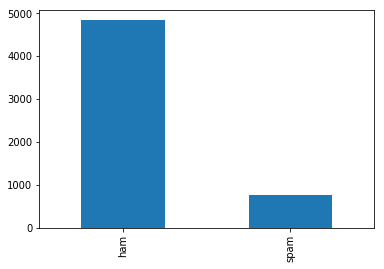

In [0]:
df_labelCount.plot(kind='bar')

In [0]:
#Adding new columns for prediction and testing of input also,ham and spam has been changed to 0,1 for classification
df['label_num']=df.label.map({'ham':0,'spam':1})

In [0]:
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [0]:
x=df.message

In [0]:
y=df.label_num

In [0]:
x.shape,y.shape

((5572,), (5572,))

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 1)

In [0]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4179,), (1393,), (4179,), (1393,))

In [0]:
cv = CountVectorizer()
cv.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
x_train_f=cv.transform(x_train)
x_train_ft=cv.fit_transform(x_train)

In [0]:
x_test_t= cv.transform(x_test)

In [0]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()

In [0]:
mb.fit(x_train_ft,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_pred= mb.predict(x_test_f)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
len(y_pred)

1393

In [0]:
('True:',y_test.values[6]),('True:',y_pred[6])

(('True:', 0), ('True:', 0))

In [0]:
#Just to verify,how much prediction was correct
count=0
for i in range(len(y_pred)):
  if y_test.values[i]==y_pred[i]:
    count+=1
    
print(count)    

1373


In [0]:
print('accuracy_Percentage:',count/len(y_pred))

accuracy_Percentage: 0.9856424982053122


In [0]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1205,    8],
       [  12,  168]])

In [0]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1213
           1       0.95      0.93      0.94       180

    accuracy                           0.99      1393
   macro avg       0.97      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [0]:
df_x=df.iloc[:,1]
df_y=df.iloc[:,2]

In [0]:
df_x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
5       FreeMsg Hey there darling it's been 3 week's n...
6       Even my brother is not like to speak with me. ...
7       As per your request 'Melle Melle (Oru Minnamin...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
10      I'm gonna be home soon and i don't want to tal...
11      SIX chances to win CASH! From 100 to 20,000 po...
12      URGENT! You have won a 1 week FREE membership ...
13      I've been searching for the right words to tha...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
15      XXXMobileMovieClub: To use your credit, click ...
16                             Oh k...i'm watching here:)
17      Eh u r

In [0]:
test_arr=['I am a boy','I want free entry']
testing=pd.Series(test_arr)
vct=CountVectorizer()
transform_x=vct.fit_transform(df_x)
testing=vct.transform(testing)
mb.fit(transform_x,df_y)
mb.predict(testing)

array([0, 1])